### AI Lab -  Assignment 2 - CH22M503

#### Author - Aloy Banerjee
###### Roll No. CH22M503

### Question:
##### You have to work only with the file with your roll number specified on it. Each dataset has 6 features x1, x2, ..., x6 and 3 targets y1, y2, y3.

##### Q1 For the given dataset, fit a linear model for the following cases:
##### (a) y1 and x1 [1 mark]
##### (b) y1 and x2 [1 mark]
##### (c) Perform Linear Regression Diagnostics for the two models [1 mark]
##### Q2 Fit Multivariate Linear Regression Models for the following cases along with diagnostics:
##### (a) y1 and x1, x2 [1 mark]
##### (b) y2 and x1, x2, ..., x6 [1 mark]
##### Q3 Fit Principal Components Regression (PCR) and Partial Least Squares (PLS) model to
##### y1, y2, y3 and x1, x2, ..., x6. [1 +1 marks]
##### Q4 Find the optimal number of components in both models. Justify your findings. [1 +1 marks]
##### Q5 Compare the performance of PCR and PLS models.

#### Reference used 

In [1]:
#https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/
#https://people.duke.edu/~rnau/testing.htm
#https://www.statsmodels.org/stable/diagnostic.html
#https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html

#### Common variable declaration

In [2]:
workingDir = 'E:\\Document\\M-Tech\\M-Tech Class\\2nd Trimester\\Assignment\\AI Lab\\Assignment 2\\Datasets'
dataset_fileName = 'ch22m503.csv'

#### Common function

In [58]:
def OLSRegression(input_val, output_val):
    """ OLS Regression
         Parameters:
          input_val: Feature values 
          output_val: Target values          
        Return value: OLS regression summary
    """
    input_var = sm.add_constant(input_val)
    model_OLS = sm.OLS(output_val, input_var).fit()
    display(model_OLS.summary())
    return model_OLS
    
def OLSRegressionManual(input_val, output_val):
    """ OLS Regression Manual
         Parameters:
          input_val: Feature values 
          output_val: Target values          
        Return value: OLS regression : Coeeficient values, SSE, SST and RMSE value
    """
    input_val_mean = input_val.mean()
    output_val_mean = output_val.mean() 
    Sxx = np.sum((input_val - input_val_mean)**2)
    Sxy = np.sum((input_val - input_val_mean)*(output_val-output_val_mean))
    Syy = np.sum((output_val-output_val_mean)**2)
    #Alpha coefficient calculation
    alpha = Sxy/Sxx
    print('Alpha Manual', alpha, sep=':')
    #Beta coefficient calculation
    beta = output_val_mean - alpha*input_val_mean 
    print('Beta Manual',beta, sep=':')
    #Find the Y hat - Estimated output y value 
    output_val_hat = alpha*input_val + beta
    #Sum squared error calculation
    SSE = np.sum(np.square(output_val - output_val_hat))
    print('SSE Manual', SSE, sep=':')
    #Sum squared total calculation
    SST = np.sum(np.square(output_val - output_val_mean))
    print('SST Manual', SST, sep=':')
    #R2 Calculation
    RSquared_Manual = 1 - ((SSE)/(SST))
    print('RSquared Manual (1 - (SSE/SST)): ', RSquared_Manual)
    
    
def OLSMultivariateRegressionManual(input_X, output_Y):
    """ OLS multivariate Regression Manual
         Parameters:
          input_val: Feature values 
          output_val: Target values          
        Return value: OLS multivariate regression : Coeeficient values, SSE, SST and RMSE value
    """
    #Add constant 1 to calculate the intercept term
    boolCheck = all(item in input_X.columns for item in ['Const'])
    if(boolCheck!=True):
        input_X.insert(0,'Const',1)
    input_X_const = input_X.to_numpy()
    output_Y = output_Y.to_numpy()
    #Beta coefficient with constant term added
    #Beta = (XT . X)-1 . XT . y
    part1_beta_const = np.linalg.inv(np.dot(input_X_const.T,input_X_const))
    part2_beta_const = np.dot(input_X_const.T,output_Y)
    beta_cofficient_matrix_with_const =np.dot(part1_beta_const,part2_beta_const)
    print('Beta Coefficient matrix with constant : ',beta_cofficient_matrix_with_const)
    #SSE = (y-X.Beta)T . (y-X.Beta)
    SSE_with_const_Part1 = (output_Y - np.dot(input_X_const,beta_cofficient_matrix_with_const)).T
    SSE_with_const_Part2 = (output_Y - np.dot(input_X_const,beta_cofficient_matrix_with_const))
    SSE_Matrix_Manipulation_with_Const = np.dot(SSE_with_const_Part1,SSE_with_const_Part2)
    print('Sum Squared Error with const(SSE) : ',SSE_Matrix_Manipulation_with_Const)
    #SST = (y-ybar)T . (y-ybar)
    output_Y_mean = output_Y.mean() 
    SST_with_const_Part1 = (output_Y - output_Y_mean).T
    SST_with_const_Part2 = (output_Y - output_Y_mean)
    SST_Matrix_Manipulation_with_Const = np.dot(SST_with_const_Part1,SST_with_const_Part2)
    print('Sum Squared Total with const(SST) : ',SST_Matrix_Manipulation_with_Const)
    #R2 Calculation
    RSquared_Manual = 1 - ((SSE_Matrix_Manipulation_with_Const)/(SST_Matrix_Manipulation_with_Const))
    print('RSquared Manual (1 - (SSE/SST)): ', RSquared_Manual)
     
    
def relationship(col1, col2, true_output, pred_output, dataset, onetime = False):
    """ Verify the relationship
         Parameters:
          col1: Feature name 
          col2: Feature name 
          true_output: True value of output
          pred_output: Estimated value of output
          dataset: total data
          onetime: display the result once or not
        Return value: Residual mean and Standardized Residuals and Residuals plots 
    """
    sns.pairplot(dataset[[col1,col2]])
    plt.show()
    if(onetime == False):
        print("R squared: {}".format(r2_score(y_true=true_output, y_pred=pred_output)))
    
def errorNormality(std_residual):    
    """ Checking for Normality of residual as per linear regression assumption
         Parameters:
          std_residual: standard residual
        Return value: Standardized Residuals plots 
    """
    sns.displot(std_residual, kde=True)
    plt.title("Normality of error terms/residuals")
    plt.show()
    sm.qqplot(std_residual, line="s")
    plt.show()
    
def meanVarianceofResidualCheck(col1,std_residual, dataset, onetime = False):
    """ Verification of residual as per linear regression assumption
         Parameters:
          col1: Feature name 
          std_residual: standard residual
          dataset: total data
          onetime: display the result once or not
        Return value: Residual mean and Standardized Residuals and Residuals plots 
    """
    print('=====#Verify Zero mean of residuals/erros======')
    mean_residuals = np.mean(std_residual)
    if(onetime == False):
        print('Mean Residuals :', mean_residuals)

    print('=====# Homoscedasticity (Constant variance of errors)======')
    p = sns.scatterplot(x=dataset[col1], y=std_residual)
    plt.xlabel(col1)
    plt.ylabel("Standardized Residuals")
    plt.show()

    print('=====# Graphical interpretaion of equal variance. If we draw residual plot, then by checking whether the residue are equally distributed on either side of 0 or mean of residue or not.# If they are distributed evenly on either side of their mean we can conclude that they have constant variance')
    p = sns.scatterplot(x=dataset[col1], y=std_residual)
    plt.ylabel("Residuals")
    plt.show()
    
    
def statisticalCheckforhomoscedastic(std_residual,inputwithconst):
    """ Statistical check for homoscedasticity
         Parameters:
          std_residual: standard residual          
          inputwithconst: input value with constant
        Return value: Statistical result in terms of F statistics and P value
    """
    # Hypothesis testing for equal variance 
    # Null hypothesis : Residual/errors are homoscedastic
    name = ["F statistic", "p-value"]
    test_part = smapi.het_goldfeldquandt(std_residual, inputwithconst)
    display(lzip(name, test_part))
    
def correlationCheck(col1,std_residual,lags):
    """ Calculate the correlation  
         Parameters:
          col1: Feature name 
          std_residual: standard residual
          lags : time series lag
        Return value: ACF plot
    """
    # Checking for correlation of residuals with feature
    corr_test = pearsonr(dataset[col1], std_residual)
    print(f'Correlation of feature {col1} with standardize residual:', corr_test[0])
    # Autocorrelation between residuals
    sm.graphics.tsa.plot_acf(std_residual, lags=lags)
    plt.show()

def RMSE(output, pred_Output):
    """ Calculate the RMSE
         Parameters:
          output: Output given in dataset 
          pred_Output: Predicted output generated by model
        Return value: RSqauer value
    """
    error = np.array(output) - np.array(pred_Output)
    se = np.sum(error**2)
    mse = se/len(output)
    rmse = np.sqrt(mse)
    SSt = np.sum((output - np.mean(output))**2)
    R2 = 1 - (se/SSt)
    return float(rmse)

#### Importing Library

In [4]:
#Import library 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.stats.api as smapi
from statsmodels.compat import lzip
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cross_decomposition import PLSRegression

sns.set(context="notebook", palette="Spectral", style="darkgrid", font_scale=1.5, color_codes=True)

##### Loading Dataset

In [5]:
#Change the working directory 
os.chdir(workingDir)
#Load the data
dataset = pd.read_csv(dataset_fileName)

##### Display info of dataset

In [6]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y1      300 non-null    float64
 1   y2      300 non-null    float64
 2   y3      300 non-null    float64
 3   x1      300 non-null    float64
 4   x2      300 non-null    float64
 5   x3      300 non-null    float64
 6   x4      300 non-null    float64
 7   x5      300 non-null    float64
 8   x6      300 non-null    float64
dtypes: float64(9)
memory usage: 21.2 KB


None

##### Display statistical information of each column of dataset 

In [7]:
display(dataset.describe())

,y1,y2,y3,x1,x2,x3,x4,x5,x6
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.971704,1.894681,1.938561,-0.000556,0.001934,-0.000120,0.004810,0.000395,-0.002939
std,6.712703,4.496053,3.968322,0.047096,0.050554,0.050415,0.041201,0.035499,0.031131
min,-18.071698,-13.808136,-9.571848,-0.143030,-0.147243,-0.184994,-0.103076,-0.090455,-0.096776
25%,-2.169525,-1.299587,-0.494731,-0.030571,-0.034597,-0.038382,-0.026517,-0.026435,-0.022263
50%,1.607958,1.912733,1.621601,-0.001074,0.003144,0.003498,0.005663,0.001777,-0.001468
75%,6.334674,5.076724,4.417613,0.033125,0.040575,0.035981,0.030797,0.023777,0.018341
max,23.005748,13.527036,14.078908,0.160984,0.144788,0.122464,0.135587,0.085364,0.091987


##### Display the given dataset 

In [8]:
display(dataset)

,y1,y2,y3,x1,x2,x3,x4,x5,x6
0,4.032059,4.380135,2.466634,0.000837,0.001992,0.031592,-0.033059,-0.004093,0.001486
1,3.940345,4.276451,2.457723,-0.002535,0.004551,0.029849,0.025805,0.030363,-0.017328
2,13.427120,11.876140,6.802207,0.023598,0.042402,0.107008,-0.020884,0.022644,-0.020999
3,-0.595405,-0.400295,0.783955,0.011311,-0.020204,-0.022805,0.052265,-0.030691,0.015796
4,-0.660072,0.637356,0.515951,-0.049540,0.013128,-0.011487,-0.024079,0.037111,-0.025304
...,...,...,...,...,...,...,...,...,...
295,-6.480876,-4.391700,-2.152671,-0.030116,-0.033487,-0.060712,0.003858,-0.025873,0.035290
296,-1.752936,0.068624,-0.471807,0.006568,-0.042976,-0.006432,0.014582,-0.054451,-0.005245
297,3.862183,6.299373,1.507590,-0.035834,0.001830,0.063450,-0.009888,0.015747,-0.091078
298,2.071755,0.373426,3.238364,-0.074970,0.084574,-0.039531,-0.055545,-0.009055,-0.033014


##### Checking for null or na values in data set 

In [9]:
dataset.isnull().isna().values.any()

False

###### Q1 For the given dataset, fit a linear model for the following cases:¶
###### (a) y1 and x1 

In [10]:
Q1_a_input_x1 = dataset['x1']
Q1_a_output_y1 = dataset['y1']

###### Apply Ordinary Least Square using library

In [11]:
OLSRegression(Q1_a_input_x1,Q1_a_output_y1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     278.9
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           1.20e-44
Time:                        10:42:34   Log-Likelihood:                -897.31
No. Observations:                 300   AIC:                             1799.
Df Residuals:                     298   BIC:                             1806.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0268      0.279      7.263      0.000       1.478       2.576
x1            99.0979      5.934     16.699      0.000      87.419     110.777
==============================================================================
Omnibus:                        6.745   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                7.126
Skew:                          -0.266   Prob(JB):                       0.0283
Kurtosis:                       3.536   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Apply Ordinary Least Square using manual calculation

In [12]:
OLSRegressionManual(Q1_a_input_x1,Q1_a_output_y1)

Alpha Manual:99.0979327073673
Beta Manual:2.026769386513777
SSE Manual:6960.108381490715
SST Manual:13473.054603949178
RSquared Manual (1 - (SSE/SST)):  0.483405316308108


##### Using both manual and stats-model calculation , coefficient alpha,  beta and R-Squared values are matching.

###### (b) y1 and x2 

In [13]:
Q1_b_input_x2 = dataset['x2']
Q1_b_output_y1 = dataset['y1']

###### Apply Ordinary Least Square using library

In [14]:
OLSRegression(Q1_b_input_x2,Q1_b_output_y1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     320.8
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           3.35e-49
Time:                        10:42:34   Log-Likelihood:                -886.78
No. Observations:                 300   AIC:                             1778.
Df Residuals:                     298   BIC:                             1785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7868      0.270      6.627      0.000       1.256       2.317
x2            95.6038      5.338     17.910      0.000      85.099     106.108
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.501
Skew:                          -0.052   Prob(JB):                        0.778
Kurtosis:                       2.829   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Apply Ordinary Least Square using manual calculation

In [15]:
OLSRegressionManual(Q1_b_input_x2,Q1_b_output_y1)

Alpha Manual:95.60375343697925
Beta Manual:1.786781498112259
SSE Manual:6488.489373067721
SST Manual:13473.054603949178
RSquared Manual (1 - (SSE/SST)):  0.5184099253063343


##### Using both manual and stats-model calculation , coefficient alpha, beta and R-Squared values are matching.

##### Testing the assumptions of linear regression
###### 1. Relationship between X & Y is approximately linear
###### 2. Errors are normally distributed
###### 3. Error term has zero mean and constant variance
###### 4. Errors are uncorrelated (with features and autocorrelation)

#### (c) Linear Regression Diagnostics for y1 as output and x1 as input 

In [16]:
#Q1_a_input_x1,Q1_a_output_y1
input_var_x1 = sm.add_constant(Q1_a_input_x1)
model_OLS_part1 = sm.OLS(Q1_a_output_y1, input_var_x1).fit()
Q1_a_output_y1_pred = model_OLS_part1.fittedvalues  # Get Predictions
residuals_part1 = model_OLS_part1.resid  # Get Residuals
std_residuals_part1 = model_OLS_part1.get_influence().resid_studentized_internal #Standardized residuals
rSquare = r2_score(y_true=Q1_a_output_y1, y_pred=Q1_a_output_y1_pred)

##### 1. Relationship between x1 & y1 is approximately linear

======================1. Relationship between x1 & y1 is approximately linear========================


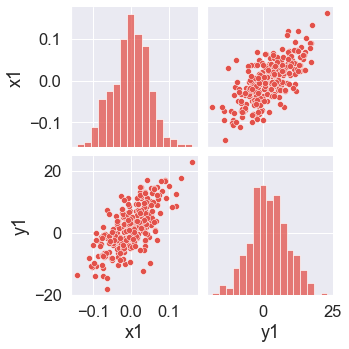

R squared: 0.483405316308108


In [17]:
print('======================1. Relationship between x1 & y1 is approximately linear========================')
relationship('x1', 'y1', Q1_a_output_y1, Q1_a_output_y1_pred,dataset)

###### Looking at the plot it is evident that both x1 and y1 are related linearly among them self, so we can fit linear model between them. R Squared value is a good indication of linear relationship between two variable and in our case R2 value is 0.483405316308108

##### 2. Errors are normally distributed

==========================2. Errors are normally distributed=====================


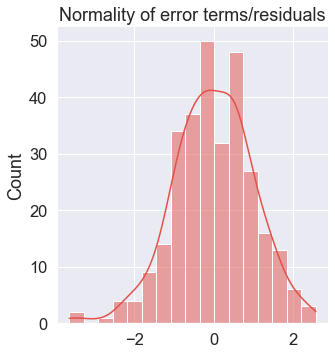

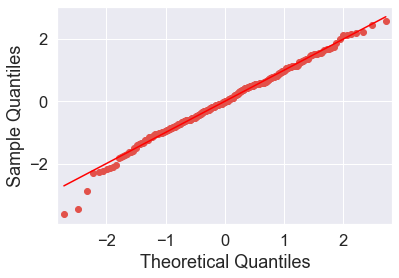

In [18]:
print('==========================2. Errors are normally distributed=====================')
errorNormality(std_residuals_part1)

###### Distribution plot of standardize residual/errors shows that residuals are distributed normally. Good fit in QQ plot indicates that normality is a reasonable approximation

##### 3.  Error term has zero mean and constant variance 

==========================3.  Error term has zero mean and constant variance =====================
=====#Verify Zero mean of residuals/erros======
Mean Residuals : 0.00010472712454576556
=====# Homoscedasticity (Constant variance of errors)======


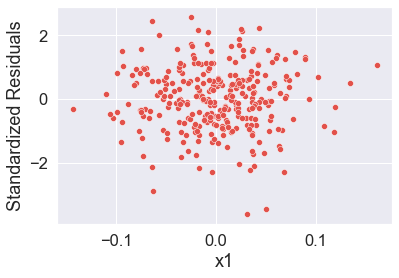

=====# Graphical interpretaion of equal variance. If we draw residual plot, then by checking whether the residue are equally distributed on either side of 0 or mean of residue or not.# If they are distributed evenly on either side of their mean we can conclude that they have constant variance


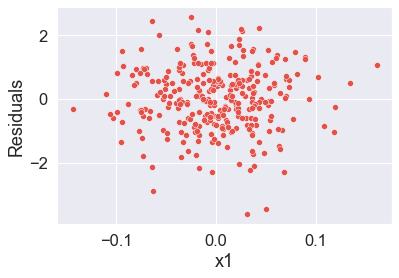

In [19]:
print('==========================3.  Error term has zero mean and constant variance =====================')
meanVarianceofResidualCheck('x1',std_residuals_part1,dataset)

######  Mean residuals value is very close to 0.
###### Plot of Standardized Residuals vs Feature shows that the plot is random and no pattern has been found so our fitted model is valid model
###### As the residue are distributed evenly on either side of their mean we can conclude that they have constant variance. 

#### Statistical measurement

In [20]:
statisticalCheckforhomoscedastic(std_residuals_part1,input_var_x1)

[('F statistic', 0.847244578296349), ('p-value', 0.8428014120217895)]

###### Higher P value indicates Variance followed Homoscedasticity 

##### 4. Errors are uncorrelated (with features and autocorrelation)

==========================4. Errors are uncorrelated (with features and autocorrelation)=====================
Correlation of feature x1 with standardize residual: 0.00030487944197560984


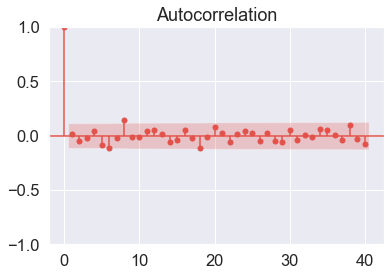

In [21]:
print('==========================4. Errors are uncorrelated (with features and autocorrelation)=====================')
correlationCheck('x1',std_residuals_part1,40)

##### Looking at the ACF plot it is evident there is no auto correlation between residuals as there is single spike at lag 0, hence we can conclude that residuals are totally uncorrelated.

#### Conclusion :  Linear Regression Diagnostics for y1 as output and x1 as input : All the assumptions of linear regression is followed after fitting the linear model.

#### (c) Linear Regression Diagnostics for y1 as output and x2 as input 

In [22]:
#Q1_b_input_x2,Q1_b_output_y1
input_var_x2 = sm.add_constant(Q1_b_input_x2)
model_OLS_part2 = sm.OLS(Q1_b_output_y1, input_var_x2).fit()
Q1_b_output_y1_pred = model_OLS_part2.fittedvalues  # Get Predictions
residuals_part2 = model_OLS_part2.resid  # Get Residuals
std_residuals_part2 = model_OLS_part2.get_influence().resid_studentized_internal #Standardized residuals
rSquare = r2_score(y_true=Q1_b_output_y1, y_pred=Q1_b_output_y1_pred)

##### 1. Relationship between x2 & y1 is approximately linear

======================1. Relationship between x1 & y1 is approximately linear========================


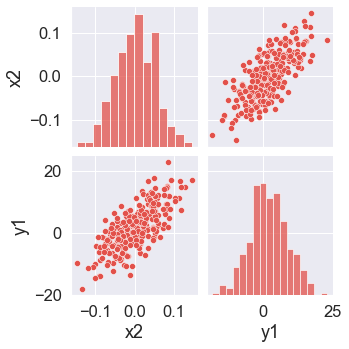

R squared: 0.5184099253063343


In [23]:
print('======================1. Relationship between x1 & y1 is approximately linear========================')
relationship('x2', 'y1', Q1_b_output_y1, Q1_b_output_y1_pred,dataset)

###### Looking at the plot it is evident that both x2 and y1 are related linearly among them self, so we can fit linear model between them. R Squared value is a good indication of linear relationship between two variable and in our case R2 value is 0.5184099253063343

##### 2. Errors are normally distributed

==========================2. Errors are normally distributed=====================


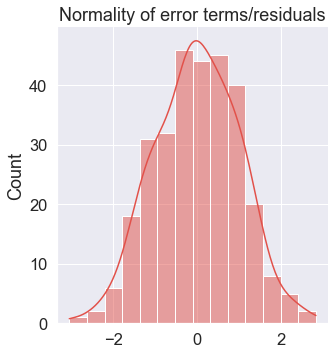

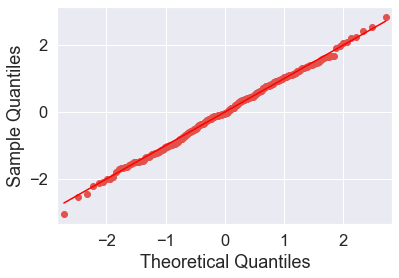

In [24]:
print('==========================2. Errors are normally distributed=====================')
errorNormality(std_residuals_part2)

###### Distribution plot of standardize residual/errors shows that residuals are distributed normally. Good fit in QQ plot indicates that normality is a reasonable approximation

##### 3.  Error term has zero mean and constant variance 

==========================3.  Error term has zero mean and constant variance =====================
=====#Verify Zero mean of residuals/erros======
Mean Residuals : 4.089964833323023e-05
=====# Homoscedasticity (Constant variance of errors)======


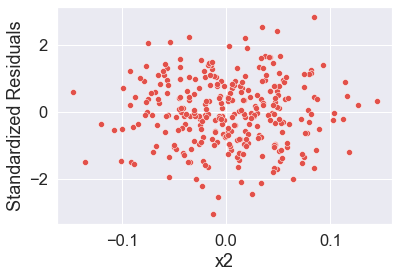

=====# Graphical interpretaion of equal variance. If we draw residual plot, then by checking whether the residue are equally distributed on either side of 0 or mean of residue or not.# If they are distributed evenly on either side of their mean we can conclude that they have constant variance


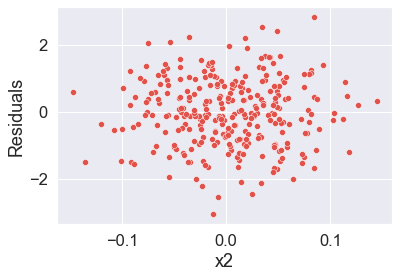

In [25]:
print('==========================3.  Error term has zero mean and constant variance =====================')
meanVarianceofResidualCheck('x2',std_residuals_part2,dataset)

######  Mean residuals value is very close to 0.
###### Plot of Standardized Residuals vs Feature shows that the plot is random and no pattern has been found so our fitted model is valid model
###### As the residue are distributed evenly on either side of their mean we can conclude that they have constant variance

#### Statistical measurement

In [26]:
statisticalCheckforhomoscedastic(std_residuals_part2,input_var_x2)

[('F statistic', 0.7754615927672754), ('p-value', 0.9384810822738299)]

###### Higher P value indicates Variance followed Homoscedasticity 

##### 4. Errors are uncorrelated (with features and autocorrelation)

==========================4. Errors are uncorrelated (with features and autocorrelation)=====================
Correlation of feature x2 with standardize residual: 0.0001655949605202725


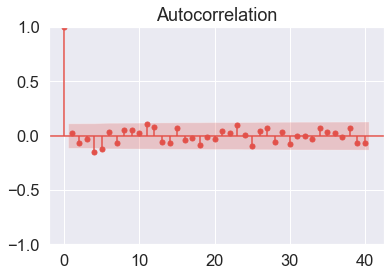

In [27]:
print('==========================4. Errors are uncorrelated (with features and autocorrelation)=====================')
correlationCheck('x2',std_residuals_part2,40)

##### Looking at the ACF plot it is evident there is no auto correlation between residuals as there is single spike at lag 0, hence we can conclude that residuals are totally uncorrelated

#### Conclusion :  Linear Regression Diagnostics for y1 as output and x2 as input : All the assumptions of linear regression is followed after fitting the linear model.

#### Q2 Fit Multivariate Linear Regression Models for the following cases along with diagnostics:

##### (a) y1 and x1, x2

In [28]:
Q2_a_input_x12 = dataset[['x1','x2']]
Q2_a_output_y1 = dataset['y1']

In [29]:
OLSRegression(Q2_a_input_x12,Q2_a_output_y1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     592.3
Date:                Fri, 27 Jan 2023   Prob (F-statistic):          2.26e-104
Time:                        10:42:37   Log-Likelihood:                -755.32
No. Observations:                 300   AIC:                             1517.
Df Residuals:                     297   BIC:                             1528.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8658      0.174     10.706      0.000       1.523       2.209
x1            78.1179      3.828     20.408      0.000      70.585      85.651
x2            77.1726      3.566     21.641      0.000      70.155      84.190
==============================================================================
Omnibus:                        5.101   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.988
Skew:                          -0.243   Prob(JB):                       0.0826
Kurtosis:                       3.404   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
OLSMultivariateRegressionManual(Q2_a_input_x12,Q2_a_output_y1)

Beta Coefficient matrix with constant :  [ 1.8658397  78.11790993 77.17261477]
Sum Squared Error with const(SSE) :  2700.930717405667
Sum Squared Total with const(SST) :  13473.054603949178
RSquared Manual (1 - (SSE/SST)):  0.7995309306759598


#### Using both manual and stats-model calculation , coefficients  and R-Squared values are matching.

##### (b) y2 and x1, x2, x3, x4, x5, x6

In [31]:
Q2_b_input_x_all = dataset[['x1','x2','x3','x4','x5','x6']]
Q2_b_output_y2 = dataset['y2']

In [32]:
OLSRegression(Q2_b_input_x_all,Q2_b_output_y2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.500e+27
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:42:37   Log-Likelihood:                 8054.0
No. Observations:                 300   AIC:                        -1.609e+04
Df Residuals:                     293   BIC:                        -1.607e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8502   3.14e-14   5.89e+13      0.000       1.850       1.850
x1            14.9883   7.58e-13   1.98e+13      0.000      14.988      14.988
x2            32.1235   7.14e-13    4.5e+13      0.000      32.124      32.124
x3            77.6587   6.59e-13   1.18e+14      0.000      77.659      77.659
x4          7.216e-15   8.14e-13      0.009      0.993    -1.6e-12    1.61e-12
x5         -4.441e-16   9.63e-13     -0.000      1.000   -1.89e-12    1.89e-12
x6         -1.243e-14   1.08e-12     -0.012      0.991   -2.13e-12     2.1e-12
==============================================================================
Omnibus:                        0.949   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.931
Skew:                           0.135   Prob(JB):                        0.628
Kurtosis:                       2.960   Cond. No.                         38.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
OLSMultivariateRegressionManual(Q2_b_input_x_all,Q2_b_output_y2)

Beta Coefficient matrix with constant :  [ 1.85022227e+00  1.49882940e+01  3.21235154e+01  7.76586827e+01
  3.55271368e-15 -3.37507799e-14 -2.30926389e-14]
Sum Squared Error with const(SSE) :  5.602253235422342e-27
Sum Squared Total with const(SST) :  6044.1321641609475
RSquared Manual (1 - (SSE/SST)):  1.0


#### Using both manual and stats-model calculation , coefficients are approximately and R-Squared value are exactly matching.

##### Testing the assumptions of multivariate linear regression
###### 1. Relationship between X & Y is approximately linear
###### 2. Errors are normally distributed
###### 3. Error term has zero mean and constant variance
###### 4. Errors are uncorrelated (with features and autocorrelation)

##### (a) y1 and x1, x2 - Diagnostics

In [34]:
#Q2_a_input_x12,Q2_a_output_y1
input_var_x12 = sm.add_constant(Q2_a_input_x12)
model_OLS_part12 = sm.OLS(Q2_a_output_y1, input_var_x12).fit()
Q2_a_output_y1_pred = model_OLS_part12.fittedvalues  # Get Predictions
residuals_part12 = model_OLS_part12.resid  # Get Residuals
std_residuals_part12 = model_OLS_part12.get_influence().resid_studentized_internal #Standardized residuals
rSquare = r2_score(y_true=Q2_a_output_y1, y_pred=Q2_a_output_y1_pred)

###### 1. Relationship between X & Y is approximately linear

======================1. Relationship between x1,x2 & y1 is approximately linear========================


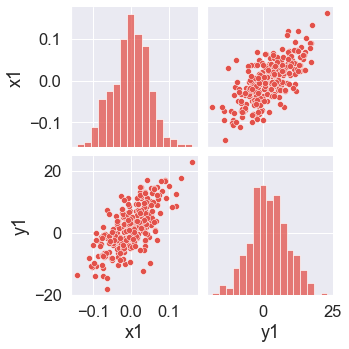

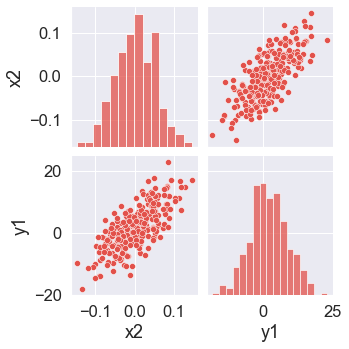

R squared: 0.7995309306759598


In [35]:
print('======================1. Relationship between x1,x2 & y1 is approximately linear========================')
relationship('x1', 'y1', Q2_a_output_y1, Q2_a_output_y1_pred, dataset, True)
relationship('x2', 'y1', Q2_a_output_y1, Q2_a_output_y1_pred, dataset)

###### Looking at the plot it is evident that both x1 and y1, x2 and y1 are related linearly among them self, so we can fit linear model between them. R Squared value is a good indication of linear relationship between two variable and the fitted model has high RSquared value of 0.7995309306759598 which means input and output is linearly related.

###### 2. Errors are normally distributed

==========================2. Errors are normally distributed=====================


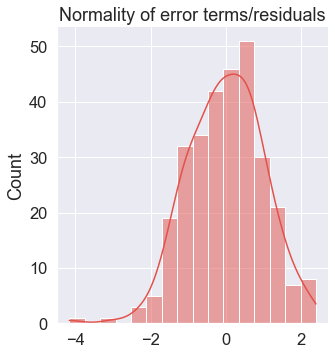

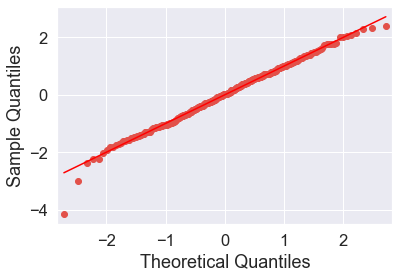

In [36]:
print('==========================2. Errors are normally distributed=====================')
errorNormality(std_residuals_part12)

###### Distribution plot of standardize residual/errors shows that residuals are distributed normally. Good fit in QQ plot indicates that normality is a reasonable approximation.

###### 3. Error term has zero mean and constant variance

==========================3.  Error term has zero mean and constant variance =====================
=====#Verify Zero mean of residuals/erros======
Mean Residuals : -9.854036680295052e-05
=====# Homoscedasticity (Constant variance of errors)======


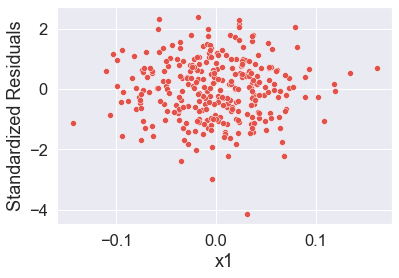

=====# Graphical interpretaion of equal variance. If we draw residual plot, then by checking whether the residue are equally distributed on either side of 0 or mean of residue or not.# If they are distributed evenly on either side of their mean we can conclude that they have constant variance


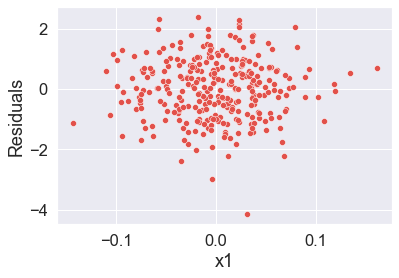

=====#Verify Zero mean of residuals/erros======
=====# Homoscedasticity (Constant variance of errors)======


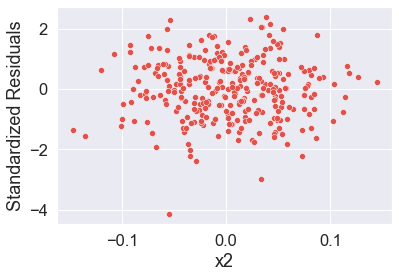

=====# Graphical interpretaion of equal variance. If we draw residual plot, then by checking whether the residue are equally distributed on either side of 0 or mean of residue or not.# If they are distributed evenly on either side of their mean we can conclude that they have constant variance


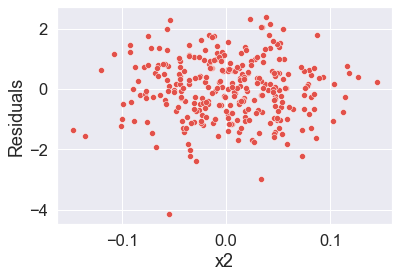

In [37]:
print('==========================3.  Error term has zero mean and constant variance =====================')
meanVarianceofResidualCheck('x1',std_residuals_part12, dataset)
meanVarianceofResidualCheck('x2',std_residuals_part12, dataset, True)

######  Mean residuals value is very close to 0.
###### Plot of Standardized Residuals vs Feature shows that the plot is random and no pattern has been found so our fitted model is valid model
###### Residue are distributed with a constant variance between 2 to -4 for both the feature

#### Statistical measurement

In [38]:
statisticalCheckforhomoscedastic(std_residuals_part12,input_var_x12)

[('F statistic', 0.9918881726046006), ('p-value', 0.5196566658162816)]

###### Higher P value indicates Variance followed Homoscedasticity 

##### 4. Errors are uncorrelated (with features and autocorrelation)

==========================4. Errors are uncorrelated (with features and autocorrelation)=====================
Correlation of feature x1 with standardize residual: 0.00012824836140756107


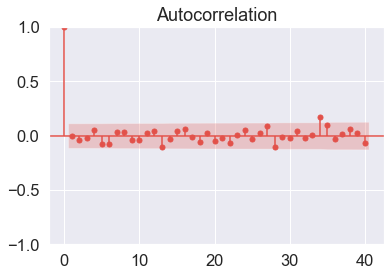

Correlation of feature x2 with standardize residual: 0.0004280008450257425


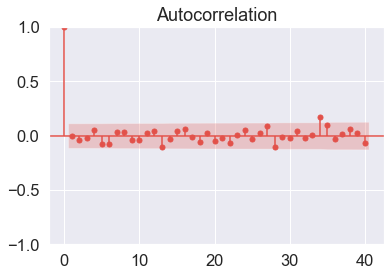

In [39]:
print('==========================4. Errors are uncorrelated (with features and autocorrelation)=====================')
correlationCheck('x1',std_residuals_part12,40)
correlationCheck('x2',std_residuals_part12,40)

##### Looking at the ACF plot it is evident there is no auto correlation between residuals as there is single spike at lag 0, hence we can conclude that residuals are totally uncorrelated

##### Conclusion : Linear Regression Diagnostics for y1 as output and x1, x2 as input : All the assumptions of linear regression is followed after fitting the linear model.

##### (b) y2 and x1, x2, x3, x4, x5, x6  - Diagnostics

In [40]:
#Q2_b_input_x_all,Q2_b_output_y2
input_var_x_all = sm.add_constant(Q2_b_input_x_all)
model_OLS_part_all = sm.OLS(Q2_b_output_y2, input_var_x_all).fit()
Q2_b_output_y2_pred_all = model_OLS_part_all.fittedvalues  # Get Predictions
residuals_part_all = model_OLS_part_all.resid  # Get Residuals
std_residuals_part_all = model_OLS_part_all.get_influence().resid_studentized_internal #Standardized residuals
rSquare = r2_score(y_true=Q2_b_output_y2, y_pred=Q2_b_output_y2_pred_all)

###### 1. Relationship between X & Y is approximately linear

======================1. Relationship between x1, x2, x3, x4, x5, x6 & y2 is approximately linear========================


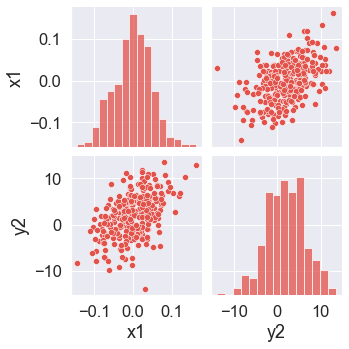

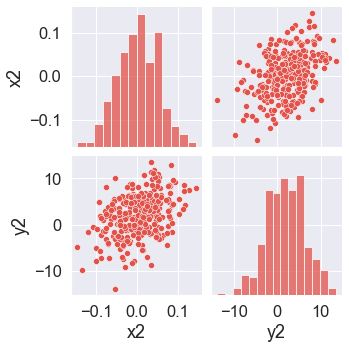

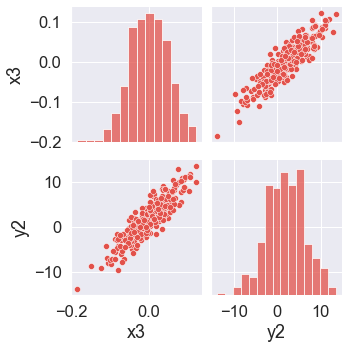

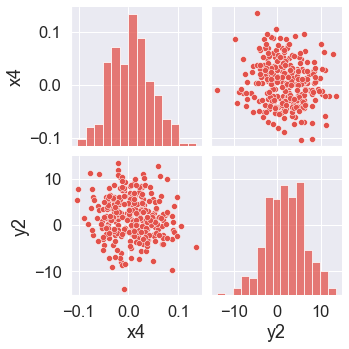

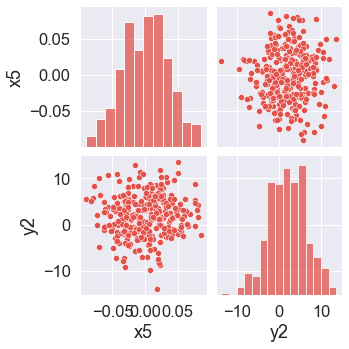

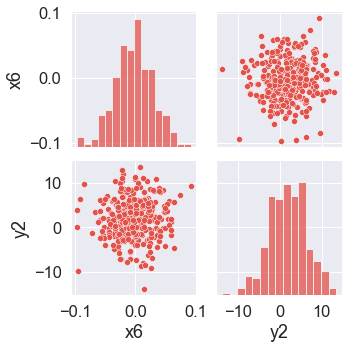

R squared: 1.0


In [41]:
print('======================1. Relationship between x1, x2, x3, x4, x5, x6 & y2 is approximately linear========================')
relationship('x1', 'y2', Q2_b_output_y2, Q2_b_output_y2_pred_all, dataset, True)
relationship('x2', 'y2', Q2_b_output_y2, Q2_b_output_y2_pred_all, dataset, True)
relationship('x3', 'y2', Q2_b_output_y2, Q2_b_output_y2_pred_all, dataset, True)
relationship('x4', 'y2', Q2_b_output_y2, Q2_b_output_y2_pred_all, dataset, True)
relationship('x5', 'y2', Q2_b_output_y2, Q2_b_output_y2_pred_all, dataset, True)
relationship('x6', 'y2', Q2_b_output_y2, Q2_b_output_y2_pred_all, dataset)

##### Looking at the plot it is evident that both x1, x2, x3, x4, x5, x6 and y2 are related linearly among them self, so we can fit linear model between them. R Squared value is a good indication of linear relationship between two variable and the fitted model has high RSquared value of 1.0 which means inputs and output are linearly related.

###### 2. Errors are normally distributed

==========================2. Errors are normally distributed=====================


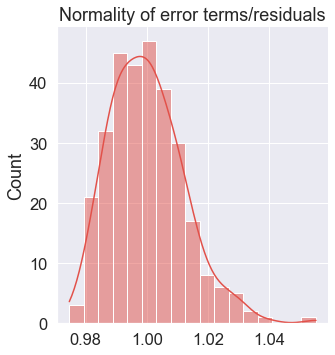

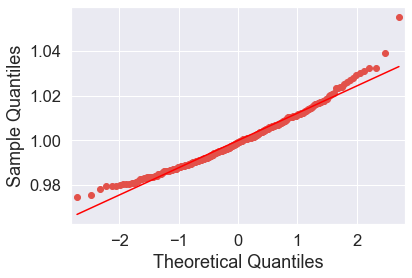

In [42]:
print('==========================2. Errors are normally distributed=====================')
errorNormality(std_residuals_part_all)

##### Distribution plot of standardize residual/errors shows that residuals are distributed almost normally. Satisfactory fit in QQ plot indicates that normality is a reasonable approximation.

###### 3. Error term has zero mean and constant variance

==========================3.  Error term has zero mean and constant variance =====================
=====#Verify Zero mean of residuals/erros======
Mean Residuals : 0.9999910498153118
=====# Homoscedasticity (Constant variance of errors)======


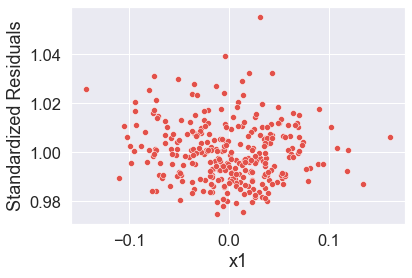

=====# Graphical interpretaion of equal variance. If we draw residual plot, then by checking whether the residue are equally distributed on either side of 0 or mean of residue or not.# If they are distributed evenly on either side of their mean we can conclude that they have constant variance


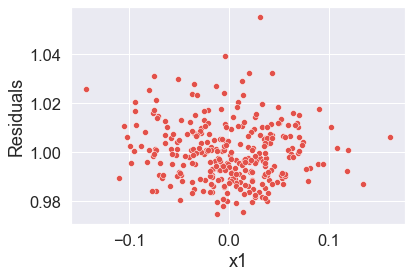

=====#Verify Zero mean of residuals/erros======
=====# Homoscedasticity (Constant variance of errors)======


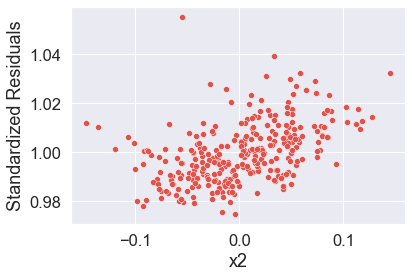

=====# Graphical interpretaion of equal variance. If we draw residual plot, then by checking whether the residue are equally distributed on either side of 0 or mean of residue or not.# If they are distributed evenly on either side of their mean we can conclude that they have constant variance


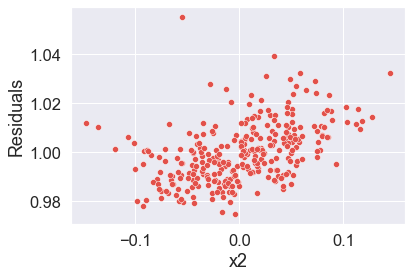

=====#Verify Zero mean of residuals/erros======
=====# Homoscedasticity (Constant variance of errors)======


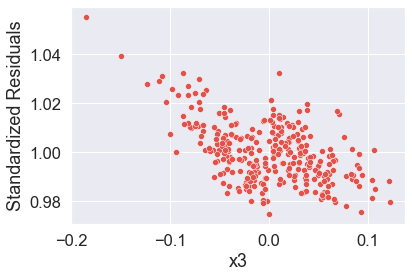

=====# Graphical interpretaion of equal variance. If we draw residual plot, then by checking whether the residue are equally distributed on either side of 0 or mean of residue or not.# If they are distributed evenly on either side of their mean we can conclude that they have constant variance


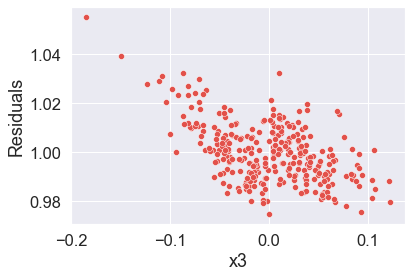

=====#Verify Zero mean of residuals/erros======
=====# Homoscedasticity (Constant variance of errors)======


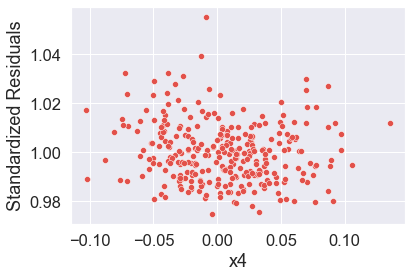

=====# Graphical interpretaion of equal variance. If we draw residual plot, then by checking whether the residue are equally distributed on either side of 0 or mean of residue or not.# If they are distributed evenly on either side of their mean we can conclude that they have constant variance


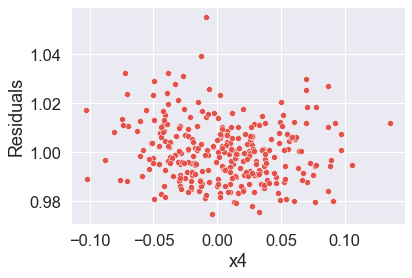

=====#Verify Zero mean of residuals/erros======
=====# Homoscedasticity (Constant variance of errors)======


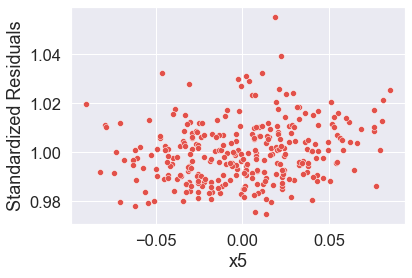

=====# Graphical interpretaion of equal variance. If we draw residual plot, then by checking whether the residue are equally distributed on either side of 0 or mean of residue or not.# If they are distributed evenly on either side of their mean we can conclude that they have constant variance


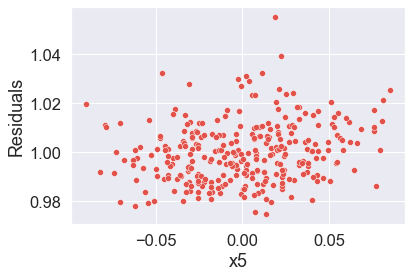

=====#Verify Zero mean of residuals/erros======
=====# Homoscedasticity (Constant variance of errors)======


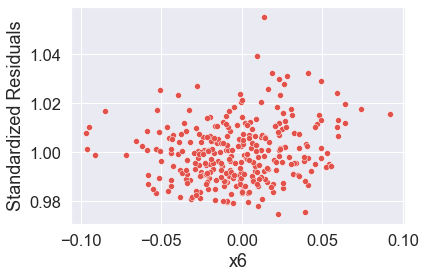

=====# Graphical interpretaion of equal variance. If we draw residual plot, then by checking whether the residue are equally distributed on either side of 0 or mean of residue or not.# If they are distributed evenly on either side of their mean we can conclude that they have constant variance


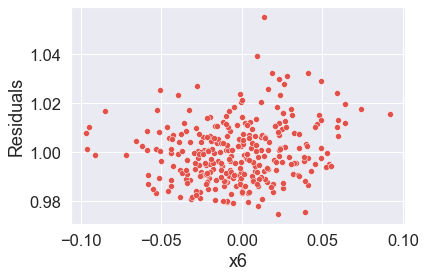

In [43]:
print('==========================3.  Error term has zero mean and constant variance =====================')
meanVarianceofResidualCheck('x1',std_residuals_part_all, dataset)
meanVarianceofResidualCheck('x2',std_residuals_part_all, dataset, True)
meanVarianceofResidualCheck('x3',std_residuals_part_all, dataset, True)
meanVarianceofResidualCheck('x4',std_residuals_part_all, dataset, True)
meanVarianceofResidualCheck('x5',std_residuals_part_all, dataset, True)
meanVarianceofResidualCheck('x6',std_residuals_part_all, dataset, True)

##### Mean residuals value is very close to 0.1 which we can be considered approximately 0 only
##### Plot of Standardized Residuals vs Feature shows that the plot is random and no pattern has been found so our fitted model is valid model. Residue are distributed with a constant variance between 0.97 to 1.06 for all the feature.

#### Statistical measurement

In [44]:
statisticalCheckforhomoscedastic(std_residuals_part_all,input_var_x_all)

[('F statistic', 0.7880159951176863), ('p-value', 0.9222381084682176)]

###### Higher P value indicates Variance followed Homoscedasticity 

##### 4. Errors are uncorrelated (with features and autocorrelation)

==========================4. Errors are uncorrelated (with features and autocorrelation)=====================
Correlation of feature x1 with standardize residual: -0.09363612757740482


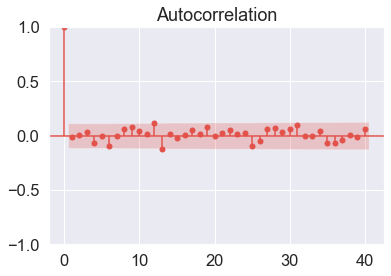

Correlation of feature x2 with standardize residual: 0.45753345589071404


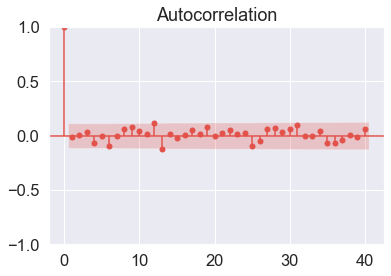

Correlation of feature x3 with standardize residual: -0.5283178045322003


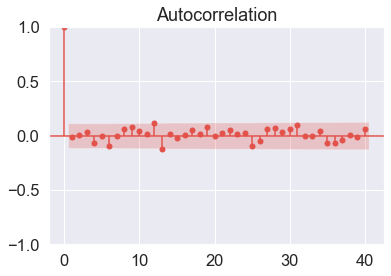

Correlation of feature x4 with standardize residual: -0.11925480564509083


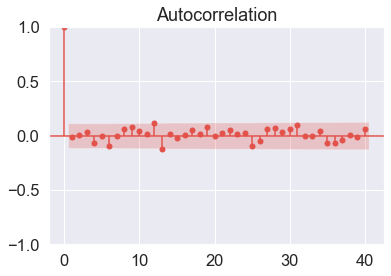

Correlation of feature x5 with standardize residual: 0.1947465445257735


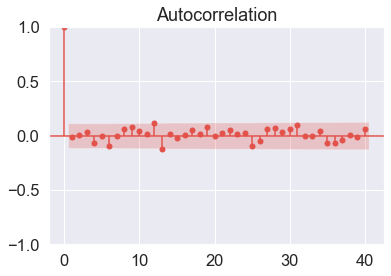

Correlation of feature x6 with standardize residual: 0.15500617485866808


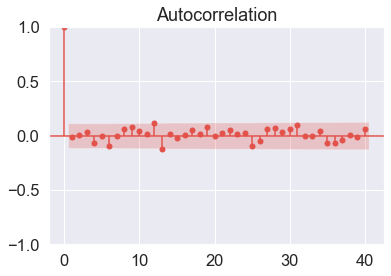

In [45]:
print('==========================4. Errors are uncorrelated (with features and autocorrelation)=====================')
correlationCheck('x1',std_residuals_part_all,40)
correlationCheck('x2',std_residuals_part_all,40)
correlationCheck('x3',std_residuals_part_all,40)
correlationCheck('x4',std_residuals_part_all,40)
correlationCheck('x5',std_residuals_part_all,40)
correlationCheck('x6',std_residuals_part_all,40)

##### Looking at the ACF plot it is evident there is no auto correlation between residuals as there is single spike at lag 0, hence we can conclude that residuals are totally uncorrelated

##### Conclusion : Linear Regression Diagnostics for y1 as output and x1, x2, x3, x4, x5 , x6 as input : All the assumptions of linear regression is followed after fitting the linear model.

#### Q3 Fit Principal Components Regression (PCR) and Partial Least Squares (PLS) model to y1, y2, y3 and x1, x2, ..., x6.

In [46]:
Q3_input_x_all = dataset[['x1','x2','x3','x4','x5','x6']]
Q3_output_y_all = dataset[['y1','y2','y3']]

In [47]:
max_nComp = 6
optimal_nComp_PCR = 5
optimal_nComp_PLS = 5

PC Value [0 1 2 3 4 5]


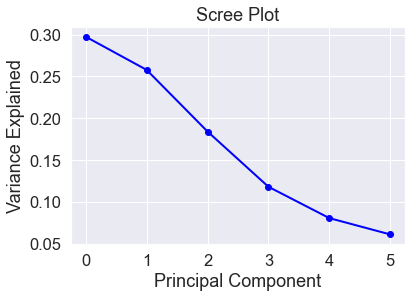

Variance Explained Ratio : [0.29748912 0.25786856 0.18423578 0.11826043 0.08082569 0.06132042]
Variance Explained : [0.00334446 0.00289904 0.00207123 0.00132952 0.00090867 0.00068938]
Cumulative Variance :  [0.2974891197119043, 0.5553576789476906, 0.739593460787737, 0.8578538908184223, 0.9386795837183038, 0.9999999999999998]


In [48]:
#setting the maximum number as PC
pca = PCA(n_components=max_nComp)
pca.fit(Q3_input_x_all)

PC_values = np.arange(pca.n_components_)
print('PC Value', PC_values)

plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print('Variance Explained Ratio :', pca.explained_variance_ratio_)
print('Variance Explained :', pca.explained_variance_)

explained_variances = pca.explained_variance_ratio_
cum_var = [np.sum(explained_variances[:i+1]) for i in range(len(explained_variances))]
print('Cumulative Variance : ', cum_var)

In [49]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=optimal_nComp_PCR), LinearRegression())
pcr.fit(Q3_input_x_all, Q3_output_y_all)
pca = pcr.named_steps["pca"]
pcr_predict=pcr.predict(Q3_input_x_all)

In [50]:
pcr_predict

array([[ 4.17736451e+00,  4.55331132e+00,  2.52053271e+00],
       [ 3.56171540e+00,  3.82519860e+00,  2.31727740e+00],
       [ 1.27780932e+01,  1.11026269e+01,  6.56146321e+00],
       [-8.92382281e-01, -7.54233118e-01,  6.73796725e-01],
       [-7.57575460e-01,  5.21151229e-01,  4.79784474e-01],
       [-8.53480716e+00, -3.02404843e+00, -4.62230718e+00],
       [ 3.69929138e+00,  5.57812166e+00,  1.52777538e+00],
       [ 9.44159996e+00,  4.89329319e+00,  6.95778152e+00],
       [ 2.43729550e+00, -1.00600973e+00,  3.83798944e+00],
       [ 1.47810461e+00,  1.72757328e+00,  1.74979131e+00],
       [ 1.92956671e+00, -1.95490328e+00,  3.87784963e+00],
       [ 6.39951998e+00,  4.07548173e+00,  4.68313694e+00],
       [ 1.90167942e-01, -2.81928637e-01,  1.41925349e+00],
       [-6.20484745e+00,  1.72532043e+00, -4.99624092e+00],
       [-3.75176587e+00, -3.24540342e+00, -3.38496192e-01],
       [ 7.10686749e+00,  5.53757192e+00,  4.50633079e+00],
       [-8.14098087e+00, -2.99071918e+00

In [51]:
pls = PLSRegression(n_components=optimal_nComp_PLS)
pls.fit(Q3_input_x_all, Q3_output_y_all)
pls_predict=pcr.predict(Q3_input_x_all)

In [52]:
pls_predict

array([[ 4.17736451e+00,  4.55331132e+00,  2.52053271e+00],
       [ 3.56171540e+00,  3.82519860e+00,  2.31727740e+00],
       [ 1.27780932e+01,  1.11026269e+01,  6.56146321e+00],
       [-8.92382281e-01, -7.54233118e-01,  6.73796725e-01],
       [-7.57575460e-01,  5.21151229e-01,  4.79784474e-01],
       [-8.53480716e+00, -3.02404843e+00, -4.62230718e+00],
       [ 3.69929138e+00,  5.57812166e+00,  1.52777538e+00],
       [ 9.44159996e+00,  4.89329319e+00,  6.95778152e+00],
       [ 2.43729550e+00, -1.00600973e+00,  3.83798944e+00],
       [ 1.47810461e+00,  1.72757328e+00,  1.74979131e+00],
       [ 1.92956671e+00, -1.95490328e+00,  3.87784963e+00],
       [ 6.39951998e+00,  4.07548173e+00,  4.68313694e+00],
       [ 1.90167942e-01, -2.81928637e-01,  1.41925349e+00],
       [-6.20484745e+00,  1.72532043e+00, -4.99624092e+00],
       [-3.75176587e+00, -3.24540342e+00, -3.38496192e-01],
       [ 7.10686749e+00,  5.53757192e+00,  4.50633079e+00],
       [-8.14098087e+00, -2.99071918e+00

##### Q4. Find the optimal number of components in both models. Justify your findings

In [80]:
col_names =  ['NComp', 'Type', 'Score']
df_Performance_Comp = pd.DataFrame(columns = col_names)

#### Verifying the performance of PLS for different N_component

In [81]:
for comp in range(1,7):
    optimal_nComp_PLS = comp
    pls_loop = PLSRegression(n_components=optimal_nComp_PLS)
    pls_loop.fit(Q3_input_x_all, Q3_output_y_all)
    score_PLS = pls_loop.score(Q3_input_x_all, Q3_output_y_all)
    dict = {'NComp': [optimal_nComp_PLS],
                         'Type': 'PLS',
                         'Score': [score_PLS]
                          }
    df_intermediate = pd.DataFrame(dict)
    df_Performance_Comp = pd.concat([df_Performance_Comp, df_intermediate],ignore_index=True)
    print(f"PLS r-squared {score_PLS}")

PLS r-squared 0.8494305909978691
PLS r-squared 0.9608861893207475
PLS r-squared 0.9873006598486619
PLS r-squared 0.9959179882121579
PLS r-squared 0.9980615191686354
PLS r-squared 1.0


#### Verifying the performance of PCR for different N_component

In [82]:
for comp in range(1,7):
    optimal_nComp_PCR = comp
    pcr_loop = make_pipeline(StandardScaler(), PCA(n_components=optimal_nComp_PCR), LinearRegression())
    pcr_loop.fit(Q3_input_x_all, Q3_output_y_all)
    score_PCR = pcr_loop.score(Q3_input_x_all, Q3_output_y_all)
    dict = {'NComp': [optimal_nComp_PCR],
                         'Type': 'PCR',
                         'Score': [score_PCR]
                          }
    df_intermediate = pd.DataFrame(dict)
    df_Performance_Comp = pd.concat([df_Performance_Comp, df_intermediate],ignore_index=True)
    print(f"PCR r-squared {score_PCR}")

PCR r-squared 0.45465305936302275
PCR r-squared 0.7241141929178383
PCR r-squared 0.8876033152524193
PCR r-squared 0.9260932657309845
PCR r-squared 0.9629212501900234
PCR r-squared 1.0


#### PCR : 
##### In real time scenario capturing >= 95% of explained variance is recommended. So if we go ahead with that consideration then we can't ignore any feature for model building. But if we are considering >=90% as a threshold for capturing explained variance the first 5 feature cover almost 93.86% of explained variance,  so we can ignore the last feature and build a regression model. Looking at the RSquared value we also observed that model is performing pretty well with N_component 5.

#### So considering this two factor first explained variance and second RSquared measure we can conclude that 5 component is optimal for PCR.


#### PLS :
##### On the contrary PLS is capable of capturing the information even if target is strongly correlated with directions that have low variance, this unique feature allows PLS to perform even well with lower component. Looking at the RSquared observation we can consider that PLS model performed pretty good with N_component of 2



#### Q5 Compare the performance of PCR and PLS models.

In [83]:
print(f"PCR r-squared {pcr.score(Q3_input_x_all, Q3_output_y_all)}")
print(f"PLS r-squared {pls.score(Q3_input_x_all, Q3_output_y_all)}")

PCR r-squared 0.9629212501900234
PLS r-squared 0.9980615191686354


In [84]:
df_Performance_Comp   

,NComp,Type,Score
0,1,PLS,0.849431
1,2,PLS,0.960886
2,3,PLS,0.987301
3,4,PLS,0.995918
4,5,PLS,0.998062
5,6,PLS,1.0
6,1,PCR,0.454653
7,2,PCR,0.724114
8,3,PCR,0.887603
9,4,PCR,0.926093


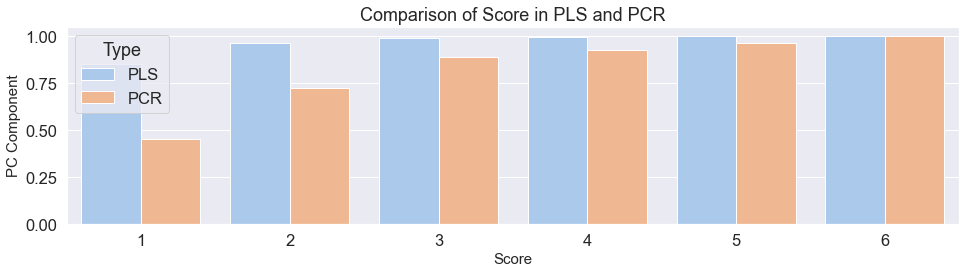

In [95]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
ax = sns.barplot(data=df_Performance_Comp, x='NComp', y='Score', hue='Type', palette='pastel')
ax.set_title('Comparison of Score in PLS and PCR')
ax.set_xlabel('Score', fontsize=15)
ax.set_ylabel('PC Component', fontsize=15)
plt.show()

### Conclusion : 
#### Comparing the plots of RSquared value for PCR and PLS we observed that PLS always outperform PCR in lower PC component and as it is approaching towards 6 the performance of PCR and PLS become same.
#### Considering 5 features we can see RSquared value of PLS is higher than that of PCR that means PLS perform better than PCR and consdering 2 features PLS outperform PCR.